In [1]:
import sys
from pathlib import Path

sys.path.insert(0, "..")

import analysis.model_card_graphics as mcg
from matplotlib import pyplot

def save(t, filename):
    p = mcg.DensityBokehPlotter("div", ".")
    p.full_color=(0, 0, 255)
    p.empty_color=(255, 190, 190)
    p.ratio = 1

    t= p.colorize_matrix(t)    
    pyplot.imshow(t / 256)
    p.create_image(t, Path("../../article_nn_pruning/images") / filename)

In [2]:
import torch

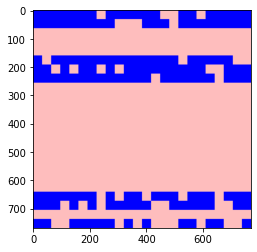

In [3]:
#t = torch.tensor([1,0,1,1,0,0, 0,0,0,0,1,1]).unsqueeze(-1)
#t = t.repeat_interleave(2 * 32, 0).repeat_interleave(24 * 32, 1)
#save(t, "attention_filled.png")

t = torch.tensor([1,0,1,1,0,0, 0,0,0,0,1,1]).unsqueeze(-1)
t = t.repeat_interleave(2, 0).repeat_interleave(24, 1)
t = t * ((torch.rand(24) < 0.75).unsqueeze(-1).repeat(1, 24))
t = t * (torch.rand(24, 24) < 0.75)
t = t.repeat_interleave(32, 0).repeat_interleave(32, 1)
save(t, "attention_block.png")



In [4]:
t = (torch.rand(768 * 4) < 0.18).unsqueeze(-1)

t = t.repeat_interleave(1, 0).repeat_interleave(768, 1).t()

save(t, "ff_col.png")

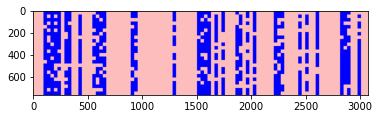

In [18]:
t = (torch.rand((768 * 4) // 32) < 0.35).unsqueeze(-1).repeat(1, 24)
t = t * (torch.rand(t.shape) < 0.75)
t = t.repeat_interleave(32, 0).repeat_interleave(32, 1).t()

save(t, "ff_block.png")
